[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Notas_Estructuradas/blob/main/Sesion06_NotasE_NotaEstructurada.ipynb)

In [ ]:
import yfinance as yf

import pandas as pd
import numpy as np

from scipy.stats import norm

# Estructura General

In [ ]:
# Datos base
inversion_total = 100_000
r_d = 0.09  # Tasa de interés doméstica (MXN)
r_f = 0.05  # Tasa extranjera (USD)
T = 1       # Tiempo en años
S = 20.0    # Tipo de cambio spot USD/MXN
K = 20.0    # Strike (at-the-money)
sigma = 0.10  # Volatilidad 10%

bono_valor_futuro = inversion_total
bono_valor_presente = bono_valor_futuro / (1 + r_d)**T

capital_opciones = inversion_total - bono_valor_presente

# Función de Black-Scholes para call sobre divisas
def call_fx_bs(S, K, r_d, r_f, sigma, T):
    d1 = (np.log(S / K) + (r_d - r_f + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * np.exp(-r_f * T) * norm.cdf(d1) - K * np.exp(-r_d * T) * norm.cdf(d2)
    return call

precio_opcion = call_fx_bs(S, K, r_d, r_f, sigma, T)

n_opciones = capital_opciones / precio_opcion

# Resultados
print(f"Valor presente del bono: ${bono_valor_presente:,.2f}")
print(f"Capital disponible para opciones: ${capital_opciones:,.2f}")
print(f"Precio de una opción call sobre USD/MXN: ${precio_opcion:,.2f}")
print(f"Cantidad de opciones que se pueden comprar: {n_opciones:,.0f}")


Valor presente del bono: $91,743.12
Capital disponible para opciones: $8,256.88
Precio de una opción call sobre USD/MXN: $1.18
Cantidad de opciones que se pueden comprar: 7,025


Donde la fórmula de Black-Scholes que estamos utilizando es para divisas:

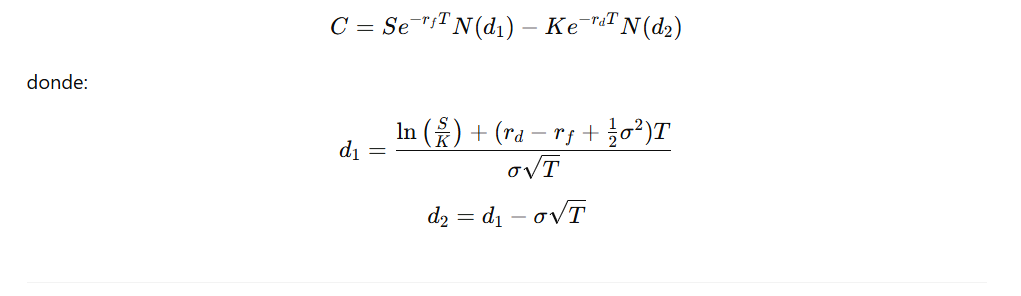

# Carga de datos de tasa libre (Cetes a 3 meses)

In [ ]:
tabla_cetes = pd.read_excel('/content/Consulta_20250514-133152192.xlsx',
                            skiprows=17, index_col='Fecha', date_format='Fecha')
tabla_cetes

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,SF43939
Fecha,
1978-01-19,10.1
1978-02-02,9.88
1978-02-16,9.82
1978-03-02,9.75
1978-03-16,9.62
...,...
2025-04-16,8.66
2025-04-24,8.63
2025-04-30,8.51


Filtrar DataFrame

In [ ]:
tabla_cetes[tabla_cetes.index > '2020-01-01']

,SF43939
Fecha,
2020-01-02,7.3
2020-01-09,7.22
2020-01-16,7.15
2020-01-23,7.11
2020-01-30,7.08
...,...
2025-04-16,8.66
2025-04-24,8.63
2025-04-30,8.51


In [ ]:
tabla_cetes['SF43939'] = pd.to_numeric(tabla_cetes['SF43939'], errors='coerce')/100

In [ ]:
tabla_cetes[tabla_cetes.index > '2020-01-01'][tabla_cetes.SF43939 >= 0.073]

<ipython-input-18-48471c3197b0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tabla_cetes[tabla_cetes.index > '2020-01-01'][tabla_cetes.SF43939 >= 0.073]


,SF43939
Fecha,
2020-01-02,0.0730
2022-05-05,0.0746
2022-05-12,0.0746
2022-05-19,0.0746
2022-05-26,0.0755
...,...
2025-04-16,0.0866
2025-04-24,0.0863
2025-04-30,0.0851


In [ ]:
tabla_cetes.tail()

,SF43939
Fecha,
2025-04-16,0.0866
2025-04-24,0.0863
2025-04-30,0.0851
2025-05-08,0.0848
2025-05-15,0.0835


In [ ]:
tabla_cetes = tabla_cetes[tabla_cetes.index > pd.to_datetime('14-05-2025', dayfirst=True) - pd.Timedelta('180 days')]
tabla_cetes

,SF43939
Fecha,
2024-11-21,0.1010
2024-11-28,0.1000
2024-12-05,0.0988
2024-12-11,0.0980
2024-12-19,0.0984
2024-12-26,0.0979
2025-01-02,0.0998
2025-01-09,0.0982
2025-01-16,0.0985


# Data de peso dolar y de bonos del tesoro a 3 meses de EUA

In [ ]:
data = yf.download(
        # Lista de tickers o puede ser un string
        tickers = "MXN=X ^IRX",

        # Parámetro "period", tambien se puede utilizar start/end
        # periodos válidos: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (opcional, default es '1mo')
        period = "1y",

        # Peidr datos por intervalo (incluye intradía si es menor a 60 days)
        # intervalos válidos: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (opcional, default es '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (opcional, default es 'column')
        # group_by = 'ticker',
    ).loc[:, 'Close']
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Ticker,MXN=X,^IRX
Date,,
2024-05-14,16.783199,5.235
2024-05-15,16.844160,5.240
2024-05-16,16.681061,5.243
2024-05-17,16.678160,5.240
2024-05-20,16.586300,5.240
...,...,...
2025-05-08,19.603081,4.215
2025-05-09,19.518700,4.215
2025-05-12,19.441641,4.280


In [ ]:
# Convertir un porcentaje a número
data['^IRX'] = data['^IRX']/100

In [ ]:
# Calculo de log-retornos
data['Volatilidad'] = np.nan
data['log_ret'] = np.log(data['MXN=X']) - np.log(data['MXN=X'].shift(1))
data['ret'] = (data['MXN=X'] / data['MXN=X'].shift(1)) - 1

In [ ]:
data

Ticker,MXN=X,^IRX,Volatilidad,log_ret,ret
Date,,,,,
2024-05-14,16.783199,0.05235,NaN,NaN,NaN
2024-05-15,16.844160,0.05240,NaN,0.003626,0.003632
2024-05-16,16.681061,0.05243,NaN,-0.009730,-0.009683
2024-05-17,16.678160,0.05240,NaN,-0.000174,-0.000174
2024-05-20,16.586300,0.05240,NaN,-0.005523,-0.005508
...,...,...,...,...,...
2025-05-08,19.603081,0.04215,NaN,-0.002117,-0.002115
2025-05-09,19.518700,0.04215,NaN,-0.004314,-0.004304
2025-05-12,19.441641,0.04280,NaN,-0.003956,-0.003948


In [ ]:
data.ffill(inplace=True)

In [ ]:
# Calculando la volatilidad
fechas_vol = data.index
for cada_fecha in fechas_vol[125:]:
    data_for_vol = fechas_vol[(cada_fecha - fechas_vol < pd.Timedelta(days=180)) & (cada_fecha - fechas_vol >= pd.Timedelta(days=0))] # 120 dias para 6 meses
    data.loc[cada_fecha, 'Volatilidad'] = np.std(data['log_ret'][data_for_vol].values, ddof=1)*np.sqrt(252)


In [ ]:
data

Ticker,MXN=X,^IRX,Volatilidad,log_ret,ret
Date,,,,,
2024-05-14,16.783199,0.05235,NaN,NaN,NaN
2024-05-15,16.844160,0.05240,NaN,0.003626,0.003632
2024-05-16,16.681061,0.05243,NaN,-0.009730,-0.009683
2024-05-17,16.678160,0.05240,NaN,-0.000174,-0.000174
2024-05-20,16.586300,0.05240,NaN,-0.005523,-0.005508
...,...,...,...,...,...
2025-05-08,19.603081,0.04215,0.138892,-0.002117,-0.002115
2025-05-09,19.518700,0.04215,0.138467,-0.004314,-0.004304
2025-05-12,19.441641,0.04280,0.135515,-0.003956,-0.003948


In [ ]:
data = data[data.index > pd.to_datetime('14-05-2025', dayfirst=True) - pd.Timedelta('180 days')]
data

Ticker,MXN=X,^IRX,Volatilidad,log_ret,ret
Date,,,,,
2024-11-18,20.356171,0.04403,0.160770,-0.004041,-0.004033
2024-11-19,20.213289,0.04408,0.161206,-0.007044,-0.007019
2024-11-20,20.109720,0.04410,0.161432,-0.005137,-0.005124
2024-11-21,20.274620,0.04413,0.161075,0.008167,0.008200
2024-11-22,20.414120,0.04415,0.160623,0.006857,0.006881
...,...,...,...,...,...
2025-05-08,19.603081,0.04215,0.138892,-0.002117,-0.002115
2025-05-09,19.518700,0.04215,0.138467,-0.004314,-0.004304
2025-05-12,19.441641,0.04280,0.135515,-0.003956,-0.003948


In [ ]:
# Hoy
hoy = pd.to_datetime('14-05-2025', dayfirst=True)

# Fecha de hace 1 año
inicio = hoy - pd.Timedelta(days=180)

# Crear rango de fechas
fechas = pd.date_range(start=inicio, end=hoy, freq='D')

# Crear DataFrame vacío con esas fechas como índice
df_vacio = pd.DataFrame(index=fechas)

df_vacio

""
2024-11-15
2024-11-16
2024-11-17
2024-11-18
2024-11-19
...
2025-05-10
2025-05-11
2025-05-12
2025-05-13


In [ ]:
info_completa = pd.concat([df_vacio, data, tabla_cetes], axis=1)
info_completa

,MXN=X,^IRX,Volatilidad,log_ret,ret,SF43939
2024-11-15,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-16,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-17,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-18,20.356171,0.04403,0.160770,-0.004041,-0.004033,NaN
2024-11-19,20.213289,0.04408,0.161206,-0.007044,-0.007019,NaN
...,...,...,...,...,...,...
2025-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-12,19.441641,0.04280,0.135515,-0.003956,-0.003948,NaN
2025-05-13,19.607401,0.04285,0.136061,0.008490,0.008526,NaN
2025-05-14,19.367001,0.04285,0.137014,-0.012336,-0.012261,NaN


In [ ]:
info_completa.isnull().sum()

,0
MXN=X,56
^IRX,56
Volatilidad,56
log_ret,56
ret,56
SF43939,156


In [ ]:
info_completa.tail(20)

,MXN=X,^IRX,Volatilidad,log_ret,ret,SF43939
2025-04-26,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,19.535160,0.04193,0.142186,-0.003314,-0.003308,NaN
2025-04-29,19.573099,0.04190,0.141985,0.001940,0.001942,NaN
2025-04-30,19.540199,0.04190,0.141797,-0.001682,-0.001681,0.0851
2025-05-01,19.589001,0.04185,0.141287,0.002494,0.002497,NaN
2025-05-02,19.600889,0.04208,0.140735,0.000607,0.000607,NaN
2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-04,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-05,19.610090,0.04208,0.141799,0.000469,0.000469,NaN


In [ ]:
info_completa['SF43939'].ffill(inplace=True)

<ipython-input-34-5f66628bb4c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  info_completa['SF43939'].ffill(inplace=True)


In [ ]:
info_completa

,MXN=X,^IRX,Volatilidad,log_ret,ret,SF43939
2024-11-15,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-16,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-17,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-18,20.356171,0.04403,0.160770,-0.004041,-0.004033,NaN
2024-11-19,20.213289,0.04408,0.161206,-0.007044,-0.007019,NaN
...,...,...,...,...,...,...
2025-05-11,NaN,NaN,NaN,NaN,NaN,0.0848
2025-05-12,19.441641,0.04280,0.135515,-0.003956,-0.003948,0.0848
2025-05-13,19.607401,0.04285,0.136061,0.008490,0.008526,0.0848
2025-05-14,19.367001,0.04285,0.137014,-0.012336,-0.012261,0.0848


In [ ]:
info_completa.dropna(inplace=True)
info_completa

,MXN=X,^IRX,Volatilidad,log_ret,ret,SF43939
2024-11-21,20.274620,0.04413,0.161075,0.008167,0.008200,0.1010
2024-11-22,20.414120,0.04415,0.160623,0.006857,0.006881,0.1010
2024-11-25,20.350840,0.04405,0.161645,-0.003105,-0.003100,0.1010
2024-11-26,20.580469,0.04395,0.161269,0.011220,0.011284,0.1010
2024-11-27,20.652500,0.04385,0.161263,0.003494,0.003500,0.1010
...,...,...,...,...,...,...
2025-05-08,19.603081,0.04215,0.138892,-0.002117,-0.002115,0.0848
2025-05-09,19.518700,0.04215,0.138467,-0.004314,-0.004304,0.0848
2025-05-12,19.441641,0.04280,0.135515,-0.003956,-0.003948,0.0848
2025-05-13,19.607401,0.04285,0.136061,0.008490,0.008526,0.0848


Recordemos que la función creada para la valuación de opciones necesita los siguientes parámtros: S, K, r_d, r_f, sigma, T

In [ ]:
info_completa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2024-11-21 to 2025-05-14
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MXN=X        123 non-null    float64
 1   ^IRX         123 non-null    float64
 2   Volatilidad  123 non-null    float64
 3   log_ret      123 non-null    float64
 4   ret          123 non-null    float64
 5   SF43939      123 non-null    float64
dtypes: float64(6)
memory usage: 6.7 KB


In [ ]:
info_completa['call_europeo'] = info_completa.apply(lambda x: call_fx_bs(
                              x['MXN=X'],
                              x['MXN=X'] + 0,
                              x['SF43939'],
                              x['^IRX'],
                              x['Volatilidad'],
                              1),
                              axis=1)

In [ ]:
info_completa

,MXN=X,^IRX,Volatilidad,log_ret,ret,SF43939,call_europeo
2024-11-21,20.274620,0.04413,0.161075,0.008167,0.008200,0.1010,1.821565
2024-11-22,20.414120,0.04415,0.160623,0.006857,0.006881,0.1010,1.830634
2024-11-25,20.350840,0.04405,0.161645,-0.003105,-0.003100,0.1010,1.833481
2024-11-26,20.580469,0.04395,0.161269,0.011220,0.011284,0.1010,1.852795
2024-11-27,20.652500,0.04385,0.161263,0.003494,0.003500,0.1010,1.860564
...,...,...,...,...,...,...,...
2025-05-08,19.603081,0.04215,0.138892,-0.002117,-0.002115,0.0848,1.458746
2025-05-09,19.518700,0.04215,0.138467,-0.004314,-0.004304,0.0848,1.449511
2025-05-12,19.441641,0.04280,0.135515,-0.003956,-0.003948,0.0848,1.415512
2025-05-13,19.607401,0.04285,0.136061,0.008490,0.008526,0.0848,1.430788


In [ ]:
import matplotlib.pyplot as plt

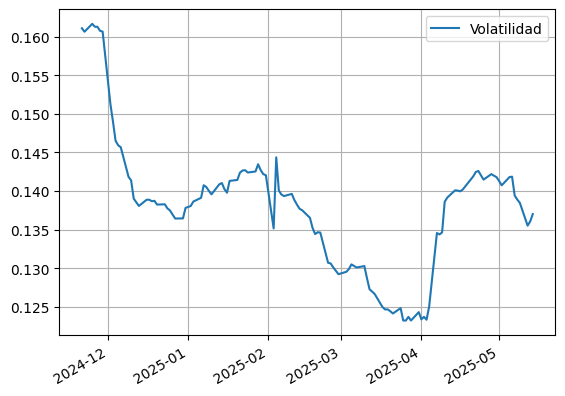

In [ ]:
info_completa['call_europeo'].plot()
plt.grid()

Volviendo al caso del inicio, si tuviese un capital de $100,000 MXN y lo invirtiera en un bono de tasa fija (tomemos aquí la tasa del cetes a 3 meses para no complicar mas), entones el capital disponible y la cantidad de opciones se pueden tener en la tabla tambien.

In [ ]:
info_completa['opciones_compradas'] = (100_000 - (100_000 / (1 + info_completa['SF43939'])**1))/info_completa['call_europeo']

In [ ]:
info_completa

,MXN=X,^IRX,Volatilidad,log_ret,ret,SF43939,call_europeo,opciones_compradas
2024-11-21,20.274620,0.04413,0.161075,0.008167,0.008200,0.1010,1.821565,5036.043293
2024-11-22,20.414120,0.04415,0.160623,0.006857,0.006881,0.1010,1.830634,5011.093109
2024-11-25,20.350840,0.04405,0.161645,-0.003105,-0.003100,0.1010,1.833481,5003.313726
2024-11-26,20.580469,0.04395,0.161269,0.011220,0.011284,0.1010,1.852795,4951.156100
2024-11-27,20.652500,0.04385,0.161263,0.003494,0.003500,0.1010,1.860564,4930.484022
...,...,...,...,...,...,...,...,...
2025-05-08,19.603081,0.04215,0.138892,-0.002117,-0.002115,0.0848,1.458746,5358.786771
2025-05-09,19.518700,0.04215,0.138467,-0.004314,-0.004304,0.0848,1.449511,5392.926660
2025-05-12,19.441641,0.04280,0.135515,-0.003956,-0.003948,0.0848,1.415512,5522.460914
2025-05-13,19.607401,0.04285,0.136061,0.008490,0.008526,0.0848,1.430788,5463.497771


Por ejemplo: el día de hoy podría comprar 5504 opciones a aprox. \$1.42 cada una (precio teórico), y como son opciones al precio actual, las voy a ejercer con cualquier aumento para recuperar algo.

Pero también podría vender calls que tengan un Strike mas alto, y así abaratar lo que haré y poder hacer mas paquetes de estos.

In [ ]:
info_completa['call_europeo_+1'] = info_completa.apply(lambda x: call_fx_bs(
                              x['MXN=X'],
                              x['MXN=X'] + 1,
                              x['SF43939'],
                              x['^IRX'],
                              x['Volatilidad'],
                              1),
                              axis=1)

In [ ]:
info_completa

,MXN=X,^IRX,Volatilidad,log_ret,ret,SF43939,call_europeo,opciones_compradas,call_europeo_+1
2024-11-21,20.274620,0.04413,0.161075,0.008167,0.008200,0.1010,1.821565,5036.043293,1.325917
2024-11-22,20.414120,0.04415,0.160623,0.006857,0.006881,0.1010,1.830634,5011.093109,1.334384
2024-11-25,20.350840,0.04405,0.161645,-0.003105,-0.003100,0.1010,1.833481,5003.313726,1.337813
2024-11-26,20.580469,0.04395,0.161269,0.011220,0.011284,0.1010,1.852795,4951.156100,1.356081
2024-11-27,20.652500,0.04385,0.161263,0.003494,0.003500,0.1010,1.860564,4930.484022,1.363442
...,...,...,...,...,...,...,...,...,...
2025-05-08,19.603081,0.04215,0.138892,-0.002117,-0.002115,0.0848,1.458746,5358.786771,0.978619
2025-05-09,19.518700,0.04215,0.138467,-0.004314,-0.004304,0.0848,1.449511,5392.926660,0.969448
2025-05-12,19.441641,0.04280,0.135515,-0.003956,-0.003948,0.0848,1.415512,5522.460914,0.935926
2025-05-13,19.607401,0.04285,0.136061,0.008490,0.008526,0.0848,1.430788,5463.497771,0.951051


In [ ]:
info_completa['diferencia'] = info_completa['call_europeo'] - info_completa['call_europeo_+1']
info_completa['opciones_compradas_delta'] = (100_000 - (100_000 / (1 + info_completa['SF43939'])**1))/info_completa['diferencia']

In [ ]:
info_completa

,MXN=X,^IRX,Volatilidad,log_ret,ret,SF43939,call_europeo,opciones_compradas,call_europeo_+1,diferencia,opciones_compradas_delta
2024-11-21,20.274620,0.04413,0.161075,0.008167,0.008200,0.1010,1.821565,5036.043293,1.325917,0.495647,18508.074754
2024-11-22,20.414120,0.04415,0.160623,0.006857,0.006881,0.1010,1.830634,5011.093109,1.334384,0.496250,18485.597961
2024-11-25,20.350840,0.04405,0.161645,-0.003105,-0.003100,0.1010,1.833481,5003.313726,1.337813,0.495668,18507.318857
2024-11-26,20.580469,0.04395,0.161269,0.011220,0.011284,0.1010,1.852795,4951.156100,1.356081,0.496714,18468.322532
2024-11-27,20.652500,0.04385,0.161263,0.003494,0.003500,0.1010,1.860564,4930.484022,1.363442,0.497121,18453.205007
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-08,19.603081,0.04215,0.138892,-0.002117,-0.002115,0.0848,1.458746,5358.786771,0.978619,0.480127,16281.341046
2025-05-09,19.518700,0.04215,0.138467,-0.004314,-0.004304,0.0848,1.449511,5392.926660,0.969448,0.480064,16283.488638
2025-05-12,19.441641,0.04280,0.135515,-0.003956,-0.003948,0.0848,1.415512,5522.460914,0.935926,0.479586,16299.716395
2025-05-13,19.607401,0.04285,0.136061,0.008490,0.008526,0.0848,1.430788,5463.497771,0.951051,0.479737,16294.559812


Si al final del año, el precio del dolar es:

- Menor a \$19.386801: Ni yo ejerzo los calls que compre ni me ejercen los que vendí, no obtengo nada

- Entre \$19.386801 y \$20.386801: Ejerzo los calls que compre y no me ejercen los que vendí, mi ganancia es el valor actual menos \$19.38 por opción

- Mayor a \$19.386801: Ejerzo los calls que compre y me ejercen los que vendí, aseguro solo una ganancía de $1 por call.

# Ejercicio 1:
Cree una pequeña tabla en la que se vea la ganancia que se obtendrá dado nivel del precio del Dólar.

Que en una columna estén distinto valores en el rango de 19.38 a 20.38 y la ganancia en otra columna

# Ejercicio 2:

Solo para el último valor de la tabla (el del día de hoy), cuantos paquetes de compra y venta de calls podría comprar si ahora probamos con varios strikes que estén por encima del valor actual del dólar.

Por ejemplo: valor + 0.1, valor + 0.2, valor + 0.3 ...

Hasta 2.0

Y gráficar la cantidad de contratos que pueden obtener para cada nivel distinto de Strike

In [ ]:
# Podemos hacer un rango en numpy con:
np.linspace(0, 2, 21)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [ ]:
info_dia = info_completa.iloc[-1,:][['MXN=X', '^IRX', 'Volatilidad', 'SF43939', 'call_europeo']]
info_dia

,2025-05-14
MXN=X,19.367001
^IRX,0.042850
Volatilidad,0.137014
SF43939,0.084800
call_europeo,1.419814


In [ ]:
deltas = np.linspace(0, 2, 21)

# DataFrame que solo tiene las deltas que agregaremos al strike
df = pd.DataFrame({'Strike+delta': deltas})

for key, value in info_dia.items():
    df[key] = value  # Esto lo añade como columna constante

In [ ]:
# Ejemplo a utilizar para calcular el call con un valor un poco mas alto al del precio Spot
df

,Strike+delta,MXN=X,^IRX,Volatilidad,SF43939,call_europeo
0,0.0,19.367001,0.04285,0.137014,0.0848,1.419814
1,0.1,19.367001,0.04285,0.137014,0.0848,1.419814
2,0.2,19.367001,0.04285,0.137014,0.0848,1.419814
3,0.3,19.367001,0.04285,0.137014,0.0848,1.419814
4,0.4,19.367001,0.04285,0.137014,0.0848,1.419814
5,0.5,19.367001,0.04285,0.137014,0.0848,1.419814
6,0.6,19.367001,0.04285,0.137014,0.0848,1.419814
7,0.7,19.367001,0.04285,0.137014,0.0848,1.419814
8,0.8,19.367001,0.04285,0.137014,0.0848,1.419814
9,0.9,19.367001,0.04285,0.137014,0.0848,1.419814


In [ ]:
df['calls_comprados'] = 0

In [ ]:
df

,Strike+delta,MXN=X,^IRX,Volatilidad,SF43939,call_europeo,calls_comprados
0,0.0,19.367001,0.04285,0.137014,0.0848,1.419814,0
1,0.1,19.367001,0.04285,0.137014,0.0848,1.419814,0
2,0.2,19.367001,0.04285,0.137014,0.0848,1.419814,0
3,0.3,19.367001,0.04285,0.137014,0.0848,1.419814,0
4,0.4,19.367001,0.04285,0.137014,0.0848,1.419814,0
5,0.5,19.367001,0.04285,0.137014,0.0848,1.419814,0
6,0.6,19.367001,0.04285,0.137014,0.0848,1.419814,0
7,0.7,19.367001,0.04285,0.137014,0.0848,1.419814,0
8,0.8,19.367001,0.04285,0.137014,0.0848,1.419814,0
9,0.9,19.367001,0.04285,0.137014,0.0848,1.419814,0


# Extra: Cuantiles

In [ ]:
data['ret'].dropna(inplace=True)
data['ret']

In [ ]:
data['ret'].hist()

In [ ]:
data['ret'].describe()

In [ ]:
data['ret'].quantile(.90)